In [1]:
import sys
print(sys.executable)

/home/melissa/miniconda3/bin/python3


In [3]:
import os 
import mne 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
%matplotlib inline

In [5]:
os.chdir('/home/melissa/SleepScorer/')
montage_name = 'standard_16grid_taini1.elc'
montage = mne.channels.read_custom_montage(montage_name)
sample_rate = 250.4
channel_types=['eeg', 'emg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
                'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'emg', 'eeg']

color_dict = dict(mag='darkblue', grad='b', eeg='k', eog='k', ecg='m',
     emg='g', ref_meg='steelblue', misc='k', stim='k',
     resp='k', chpi='k')

ch_names = ['S1Tr_RIGHT', 'EMG_RIGHT', 'M2_FrA_RIGHT', 'M2_ant_RIGHT', 'M1_ant_RIGHT', 'V2ML_RIGHT', 'V1M_RIGHT', 'S1HL_S1FL_RIGHT', 
           'V1M_LEFT', 'V2ML_LEFT', 'S1HL_S1FL_LEFT', 'M1_ant_LEFT', 'M2_ant_LEFT', 'M2_FrA_LEFT', 'EMG_LEFT', 'S1Tr_LEFT']

ch_numbers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
info = mne.create_info(ch_names = ch_names, sfreq=sample_rate, ch_types=channel_types)


## Read numpy files and break into 5 second epochs

In [81]:
os.chdir('/home/melissa/preprocessing/GRIN2B/GRIN2B_numpy')
#os.listdir('/home/melissa/preprocessing/GRIN2B/GRIN2B_numpy')

In [82]:
data_raw = np.load('227_GRIN2B.npy')
print(data_raw.shape)
start_time = int(75128*250.4)
end_time = int(85128*250.4)
data = data_raw[0:16, start_time:end_time]
custom_raw = mne.io.RawArray(data, info)

(16, 89692333)
Creating RawArray with float64 data, n_channels=16, n_times=2504000
    Range : 0 ... 2503999 =      0.000 ...  9999.996 secs
Ready.


In [87]:
test_channel = ['M2_ant_RIGHT']
test_channel_data = custom_raw.copy().pick_channels(test_channel)

## Plot raw data of normal epoch & epoch with channel loss

## 1.  Packet Loss Epoch

In [88]:
start = int(98*5*250.4)
end = start + 1252

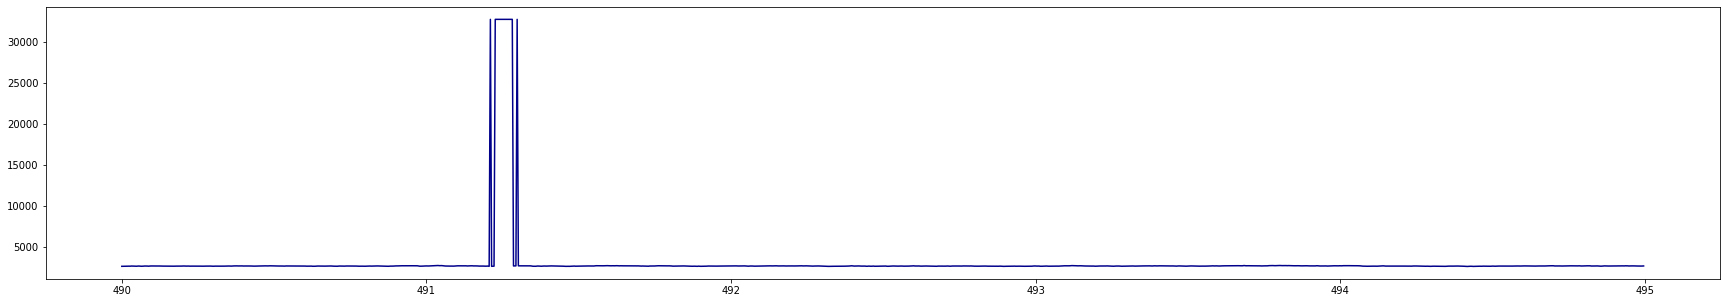

In [89]:
test_data, test_times = test_channel_data[:, start:end]
fig, (ax1) = plt.subplots(1,1, figsize=(30,5), sharex=True, sharey=True)
ax1.plot(test_times, test_data.T, color = 'darkblue')

In [90]:
start = 98*5
end = start + 5

Effective window size : 5.004 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_6613/1800542431.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  test_channel_data.plot_psd(fmin=0, fmax=100, tmin= start, tmax= end)


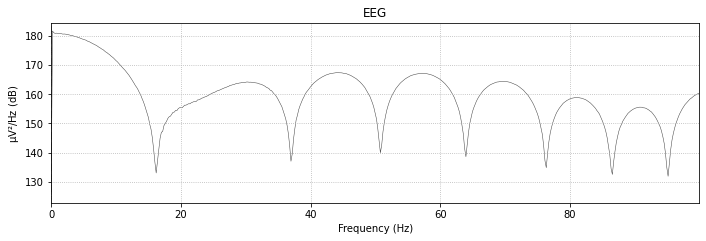

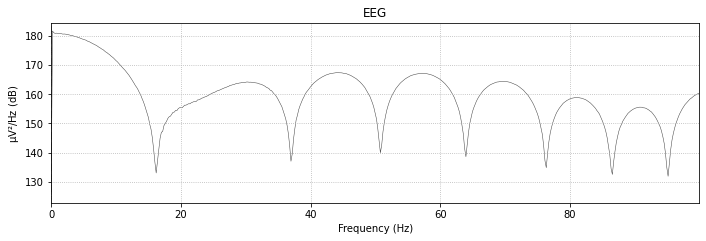

In [91]:
test_channel_data.plot_psd(fmin=0, fmax=100, tmin= start, tmax= end)

## 2. Normal Epoch 

In [93]:
start = int(137*5*250.4)
end = start + 1252

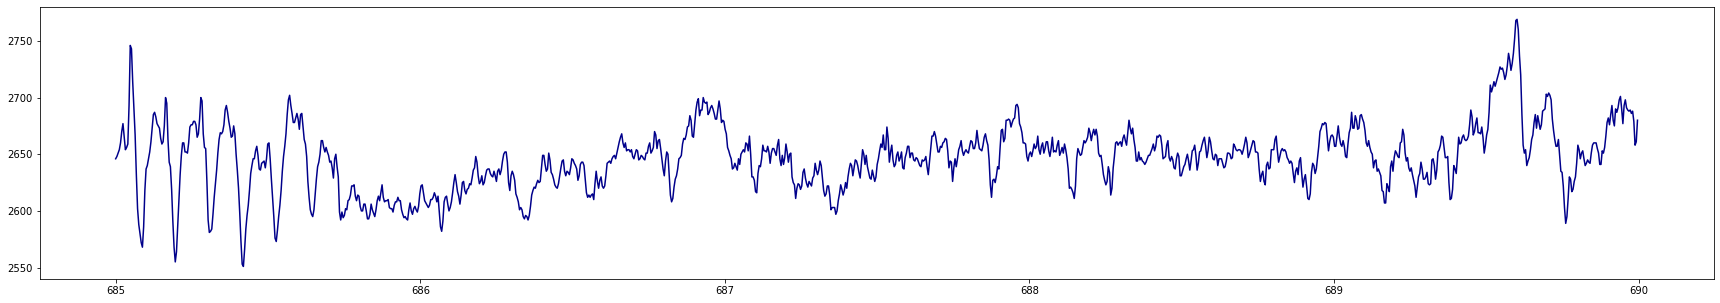

In [94]:
test_data, test_times = test_channel_data[:, start:end]
fig, (ax1) = plt.subplots(1,1, figsize=(30,5), sharex=True, sharey=True)
ax1.plot(test_times, test_data.T, color = 'darkblue')

In [96]:
start = 137*5
end = start + 5

Effective window size : 5.004 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_6613/1800542431.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  test_channel_data.plot_psd(fmin=0, fmax=100, tmin= start, tmax= end)


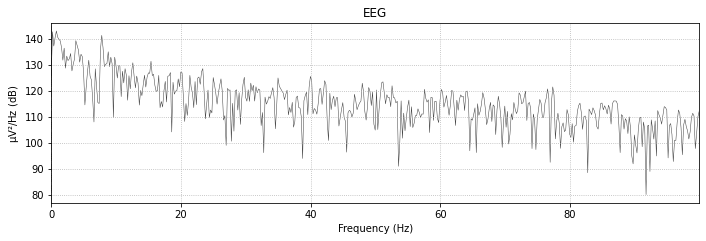

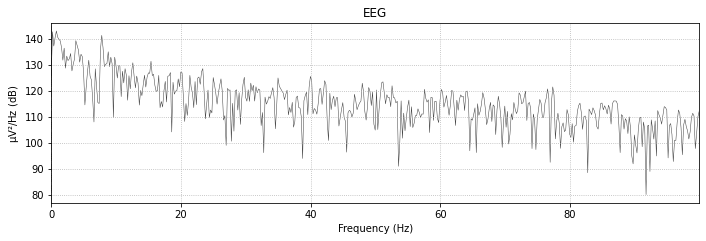

In [97]:
test_channel_data.plot_psd(fmin=0, fmax=100, tmin= start, tmax= end)

## Function to splice data into 5 seconds epochs 

In [27]:
dataset_splice_function = lambda dataset, t_len = 1252: [dataset[i:i + 1252] for i in range(0, (len(dataset)-1252), t_len)]
#spliced_data = dataset_splice_function(M1_ant_LEFT)

## Calculate amplitude threshold and if epoch exceeds threshold, then discard
